Effect of Compacted Images in Training

In [2]:
# importing packages

import os 
import random
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

# Interactive widgets
from ipywidgets import widgets

In [3]:
print("Directories in the current Directory:",os.listdir())

Directories in the current Directory: ['Image_data_preprocessing_with_a_validation_set.ipynb', 'Effect_of_Compacted_Images in_Training.ipynb', 'C1_W4_Lab_2_image_data_preprocessing_with_validation.ipynb', 'validation-horse-or-human', 'C1_W4_Lab_3_compacted_images.ipynb', 'C1_W4_Lab_1_image_data_preprocessing_no_validation.ipynb', '.ipynb_checkpoints', 'Image_data_preprocessing_without_validation.ipynb', 'horse-or-human']


In [4]:
Training_Directory = 'horse-or-human'
validation_Directory = 'validation-horse-or-human'

print("Directories in Training Directory:",os.listdir(Training_Directory))
print("Directories in validataion Directory:",os.listdir(validation_Directory))

Directories in Training Directory: ['humans', 'horses']
Directories in validataion Directory: ['humans', 'horses']


In [5]:
train_horse_dir = os.path.join(Training_Directory,'horses')
train_human_dir = os.path.join(Training_Directory,'humans')

validation_horse_dir = os.path.join(validation_Directory,'humans')
validation_human_dir = os.path.join(validation_Directory,'humans')

In [6]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

validation_horse_names = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

In [7]:
print("train_horse_names[0:5]",train_horse_names[0:5])
print("train_human_names[0:5]",train_human_names[0:5])
print()
print("validation_horse_names[0:5]",validation_horse_names[0:5])
print("validation_human_names[0:5]",validation_human_names[0:5])

train_horse_names[0:5] ['horse36-4.png', 'horse20-3.png', 'horse33-7.png', 'horse41-1.png', 'horse39-5.png']
train_human_names[0:5] ['human08-00.png', 'human08-11.png', 'human08-17.png', 'human17-12.png', 'human15-13.png']

validation_horse_names[0:5] ['valhuman04-06.png', 'valhuman03-22.png', 'valhuman04-16.png', 'valhuman05-12.png', 'valhuman04-21.png']
validation_human_names[0:5] ['valhuman04-06.png', 'valhuman03-22.png', 'valhuman04-16.png', 'valhuman05-12.png', 'valhuman04-21.png']


In [8]:
print("train_horse_names[0:5]",train_horse_names[0:5])
print("train_human_names[0:5]",train_human_names[0:5])
print()
print("validation_horse_names[0:5]",validation_horse_names[0:5])
print("validation_human_names[0:5]",validation_human_names[0:5])

train_horse_names[0:5] ['horse36-4.png', 'horse20-3.png', 'horse33-7.png', 'horse41-1.png', 'horse39-5.png']
train_human_names[0:5] ['human08-00.png', 'human08-11.png', 'human08-17.png', 'human17-12.png', 'human15-13.png']

validation_horse_names[0:5] ['valhuman04-06.png', 'valhuman03-22.png', 'valhuman04-16.png', 'valhuman05-12.png', 'valhuman04-21.png']
validation_human_names[0:5] ['valhuman04-06.png', 'valhuman03-22.png', 'valhuman04-16.png', 'valhuman05-12.png', 'valhuman04-21.png']


In [9]:
print("total number of train horse images:",len(train_horse_names))
print("total number of train human images:",len(train_human_names))
print()
print("total number of validation horse images:",len(validation_horse_names))
print("total number of validation human images:",len(validation_human_names))

total number of train horse images: 501
total number of train human images: 527

total number of validation horse images: 128
total number of validation human images: 128


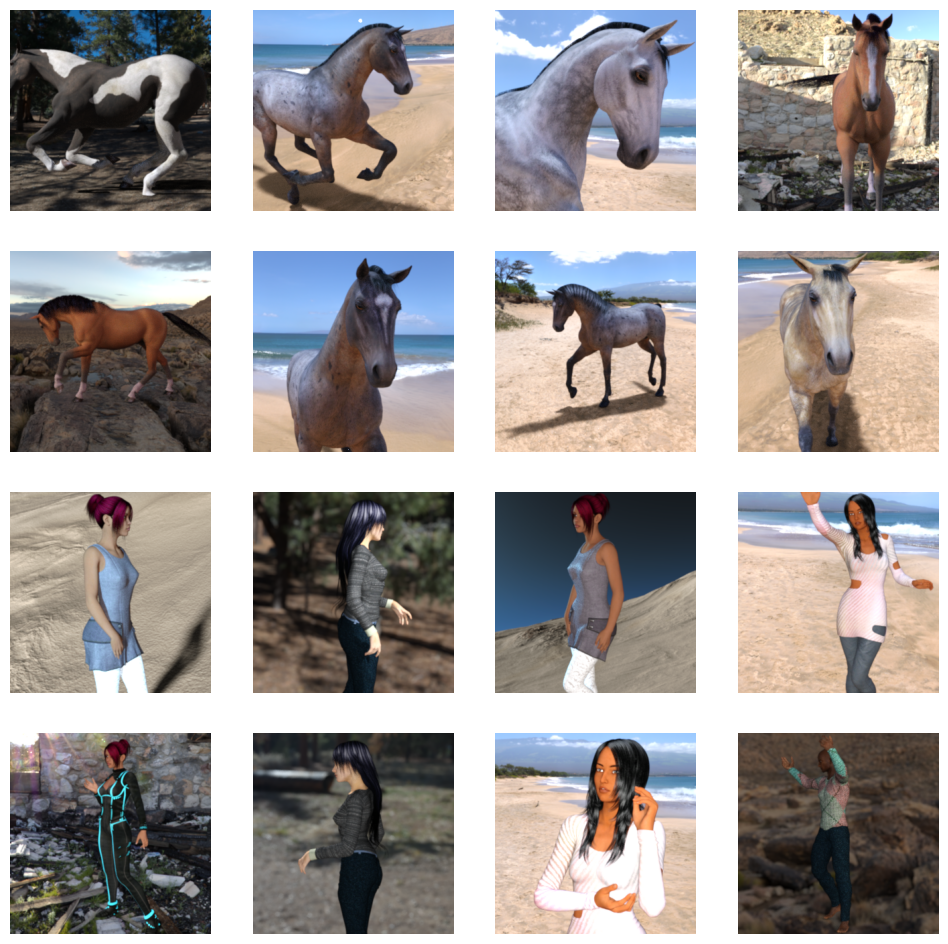

In [10]:
# Parameters for our graph; we will output images in a 4x4 configuration
nrows = 4
ncols = 4

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in random.sample(train_horse_names, k=8)]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in random.sample(train_human_names, k=8)]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [11]:
# Building a model

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(150,150,3)),

    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

2024-10-12 00:31:27.745452: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
#compiling the model
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01),
              loss = 'binary_crossentropy',
              metrics=['accuracy']
             )

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [14]:
#instantiating train dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    Training_Directory,
    image_size=(150,150),
    batch_size = 32,
    label_mode = 'binary'
)

#instantiating validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_Directory,
    image_size=(150,150),
    batch_size = 32,
    label_mode = 'binary'
)

Found 1028 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [15]:
# rescaling images

rescale_layer = tf.keras.layers.Rescaling(scale=.1/255)

def rescale_image(image,label):
    return (rescale_layer(image),label)

In [16]:
train_dataset_scaled = train_dataset.map(rescale_image)

validation_dataset_scaled = validation_dataset.map(rescale_image)

In [17]:
shuffle_buffer_size = 1000
prefetch_buffer_size = tf.data.AUTOTUNE

train_dataset_scaled.cache().shuffle(shuffle_buffer_size).prefetch(prefetch_buffer_size)
validation_dataset_scaled.cache().shuffle(shuffle_buffer_size).prefetch(prefetch_buffer_size)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [18]:
# Training

history = model.fit(
    train_dataset_scaled,
    epochs = 15,
    validation_data = validation_dataset_scaled,
    verbose = 2

)

Epoch 1/15


2024-10-12 00:31:44.028587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1028]
	 [[{{node Placeholder/_0}}]]
2024-10-12 00:31:44.029678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1028]
	 [[{{node Placeholder/_0}}]]
2024-10-12 00:31:59.065011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [256]


33/33 - 16s - loss: 1.1157 - accuracy: 0.5058 - val_loss: 0.6932 - val_accuracy: 0.5000 - 16s/epoch - 500ms/step
Epoch 2/15
33/33 - 18s - loss: 0.6938 - accuracy: 0.4893 - val_loss: 0.6933 - val_accuracy: 0.5000 - 18s/epoch - 533ms/step
Epoch 3/15
33/33 - 16s - loss: 0.6932 - accuracy: 0.5126 - val_loss: 0.6936 - val_accuracy: 0.5000 - 16s/epoch - 494ms/step
Epoch 4/15
33/33 - 18s - loss: 0.6933 - accuracy: 0.5126 - val_loss: 0.6935 - val_accuracy: 0.5000 - 18s/epoch - 534ms/step
Epoch 5/15
33/33 - 19s - loss: 0.6933 - accuracy: 0.5126 - val_loss: 0.6936 - val_accuracy: 0.5000 - 19s/epoch - 563ms/step
Epoch 6/15
33/33 - 18s - loss: 0.6931 - accuracy: 0.5126 - val_loss: 0.6934 - val_accuracy: 0.5000 - 18s/epoch - 560ms/step
Epoch 7/15
33/33 - 17s - loss: 0.6932 - accuracy: 0.5126 - val_loss: 0.6932 - val_accuracy: 0.5000 - 17s/epoch - 500ms/step
Epoch 8/15
33/33 - 17s - loss: 0.6933 - accuracy: 0.5126 - val_loss: 0.6932 - val_accuracy: 0.5000 - 17s/epoch - 521ms/step
Epoch 9/15
33/33 - 

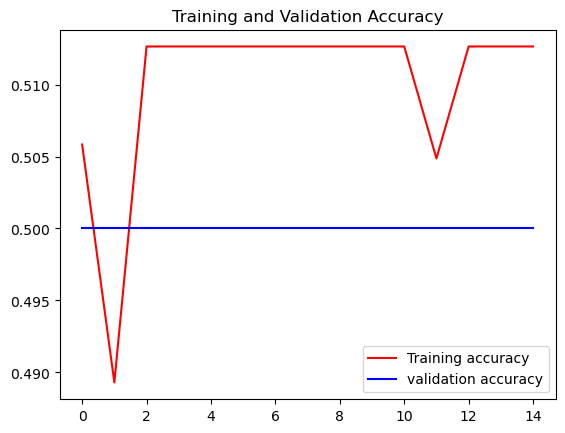

In [19]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(len(acc))

plt.plot(epoch,acc,'r',label='Training accuracy')
plt.plot(epoch,val_acc,'b',label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.show()

In [24]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = rescale_layer(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image, verbose=0)[0][0]
    
    with out:
        if prediction > 0.5:
            print(filename + " is a human")
        else:
            print(filename + " is a horse")


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    
    items = change.new
    for item in items: # Loop if there is more than one file uploaded  
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)

# Run the interactive widget
# Note: it may take a bit after you select the image to upload and process before you see the output.
uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()

### Visualizing Intermediate Representations

/tmp/ipykernel_25177/1840540786.py:41: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


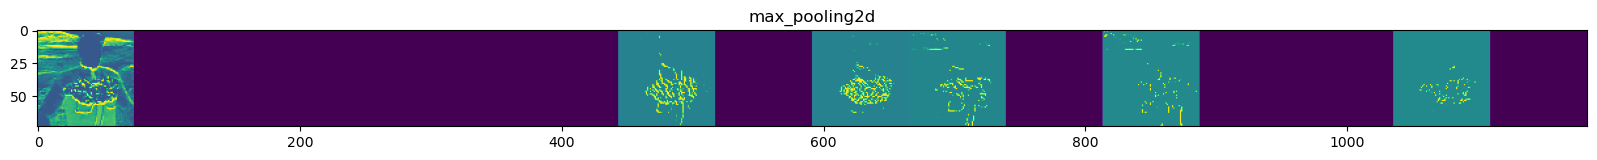

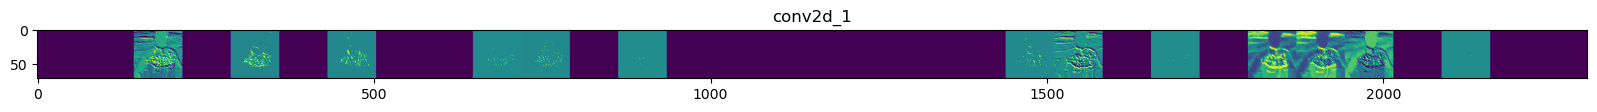

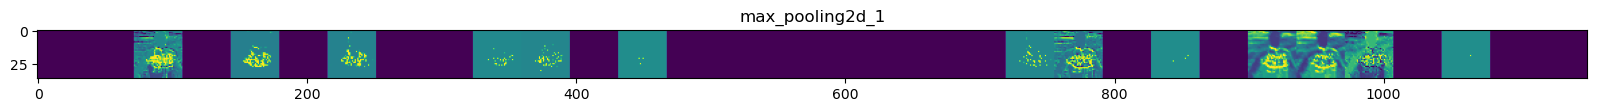

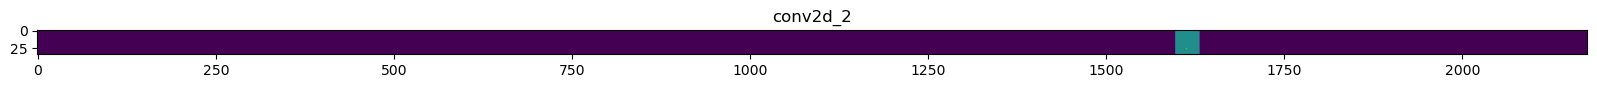

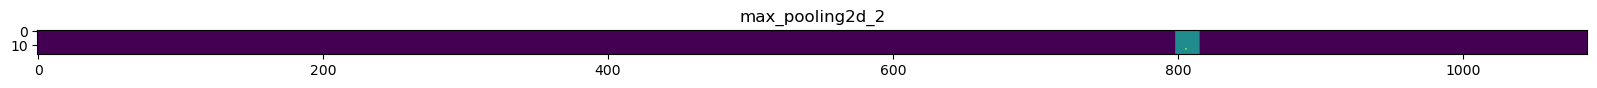

In [26]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = tf.keras.utils.load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = tf.keras.utils.img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x = rescale_layer(x)

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x, verbose=False)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map

        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x

        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')